In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_df = pd.read_csv("loan_borowwer_data.csv")
data_df.sample(n=5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8518,0,debt_consolidation,0.1450,344.21,10.491274,6.13,657,13740.000000,9060,78.1,1,0,0,0
1884,1,credit_card,0.0963,288.85,11.608236,18.41,737,3481.041667,2737,6.4,1,0,0,1
9434,0,debt_consolidation,0.1600,351.58,11.326596,16.99,677,5730.041667,4723,94.5,6,0,0,1
2835,1,major_purchase,0.1221,149.92,10.789319,16.70,712,2430.000000,5198,41.6,2,0,0,0
911,1,all_other,0.0768,31.19,10.491274,1.80,747,2520.000000,4782,16.7,0,0,0,0


In [3]:
data_df.shape

(9578, 14)

### We have 14 Features and 9578 records

In [8]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [9]:
data_df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### No Missing values

In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


###  we have just one categorical feature: purpose

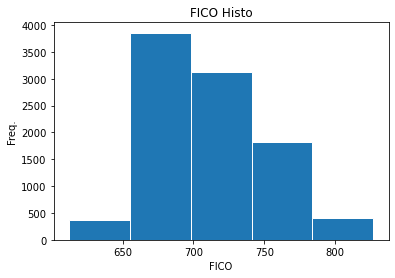

In [22]:
plt.hist(x=data_df['fico'], bins=5, edgecolor='white')
plt.xlabel('FICO')
plt.ylabel('Freq.')
plt.title('FICO Histo')
plt.show()

<AxesSubplot:xlabel='purpose', ylabel='count'>

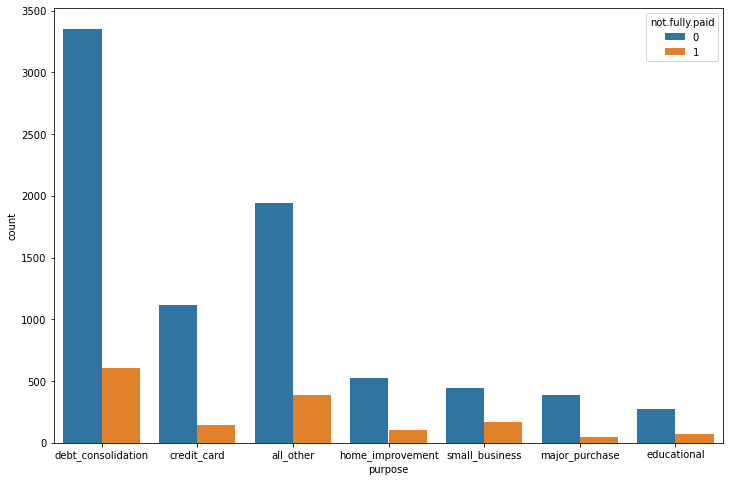

In [29]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data_df, hue='not.fully.paid', x='purpose')

In [35]:
data_df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [36]:
data_df_processed = pd.get_dummies(data_df, columns=["purpose"])
data_df_processed.sample(n=3).T

,411,2358,6145
credit.policy,1.000000,1.000000,1.000000
int.rate,0.114100,0.122100,0.085900
installment,658.670000,333.150000,189.670000
log.annual.inc,12.834681,11.112448,10.165852
dti,0.630000,11.770000,9.450000
fico,702.000000,742.000000,762.000000
days.with.cr.line,6330.041667,5129.958333,2850.000000
revol.bal,6921.000000,220.000000,21.000000
revol.util,0.000000,4.000000,0.100000
inq.last.6mths,2.000000,1.000000,0.000000


###  getting data ready for Model Traigning

In [40]:
x_features = data_df_processed.drop(columns=['not.fully.paid'])
y_target = data_df_processed['not.fully.paid']

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3, stratify=y_target, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6704, 19), (2874, 19), (6704,), (2874,))

### Training Decision Tree model

In [43]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_predict = dt.predict(x_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predict))

print("Accuracy Score: {:0.2f}%.".format(dt.score(x_test, y_test)*100))

print("Confussion matrix: ")
print(confusion_matrix(y_test, y_predict))
pd.crosstab(y_test, y_predict, rownames=["True"], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2414
           1       0.21      0.25      0.23       460

    accuracy                           0.73      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.75      0.73      0.74      2874

Accuracy Score: 73.10%.
Confussion matrix: 
[[1985  429]
 [ 344  116]]


Predicted,0,1,All
True,,,
0,1985,429,2414
1,344,116,460
All,2329,545,2874


### Training Decision Tree model

In [59]:
rtf = RandomForestClassifier()
rtf.fit(x_train, y_train)
y_predicted = rtf.predict(x_test)

In [68]:
print(classification_report(y_test, y_predict))

print("Accuracy Score: {:0.2f}%.".format(rtf.score(x_test, y_test)*100))

print(confusion_matrix(y_test, y_predict))

pd.crosstab(y_test, y_predicted, rownames=['True'], colnames=['Predicted'])

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2414
           1       0.21      0.25      0.23       460

    accuracy                           0.73      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.75      0.73      0.74      2874

Accuracy Score: 83.96%.
[[1985  429]
 [ 344  116]]


Predicted,0,1
True,,
0,2402,12
1,449,11


## Observation:
### Random forest gives better accuracy